# Data Exploration
This notebook contains the code for the fifth part of this data science project - data visualization. Section headings have been included for convenience and the full writeup is available [on my website](https://www.pineconedata.com/2024-07-29-basketball-visualizations/).

## Project Overview
This is part of a series that walks through the entire process of a data science project - from initial steps like data acquisition, preprocessing, and cleaning to more advanced steps like feature engineering, creating visualizations, and machine learning. The dataset used in this project contains individual basketball player statistics (such as total points scored and blocks made) for the 2023-2024 NCAA women’s basketball season.

### Articles in this Series   
1. [Acquiring and Combining the Datasets](https://www.pineconedata.com/2024-04-11-basketball-data-acquisition/)
2. [Cleaning and Preprocessing the Data](https://www.pineconedata.com/2024-05-02-basketball-data-cleaning-preprocessing/)
3. [Engineering New Features](https://www.pineconedata.com/2024-05-30-basketball-feature_engineering/)
4. [Exploratory Data Analysis](https://www.pineconedata.com/2024-06-28-basketball-data-exploration/)
5. [Visualizations, Charts, and Graphs](https://www.pineconedata.com/2024-07-29-basketball-visualizations/) (This Notebook)
6. [Selecting a Machine Learning Model](https://www.pineconedata.com/2024-08-12-basketball-select-ml-ols/)
7. [Training the Machine Learning Model](https://www.pineconedata.com/2024-09-13-basketball-train-ols/)
8. [Evaluating the Machine Learning Model](https://www.pineconedata.com/)


# Getting Started
Full requirements and environment setup information is detailed in the [first article of this series](https://www.pineconedata.com/2024-04-11-basketball-data-acquisition/).

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import scipy

In [2]:
pio.renderers.default = 'iframe'

## Import Data

In [3]:
from pathlib import Path


data_folder = Path.cwd().parent / 'data'

In [4]:
player_data = pd.read_excel(data_folder / 'player_data_engineered.xlsx')
player_data.head()

,PLAYER_NAME,Team,Class,Height,Position,PLAYER_ID,TEAM_NAME,GAMES,MINUTES_PLAYED,FIELD_GOALS_MADE,...,Conference,MINUTES_PER_GAME,FOULS_PER_GAME,POINTS_PER_GAME,ASSISTS_PER_GAME,STEALS_PER_GAME,BLOCKS_PER_GAME,REBOUNDS_PER_GAME,ASSIST_TO_TURNOVER,FANTASY_POINTS
0,Kiara Jackson,UNLV (Mountain West),Junior,67,Guard,ncaaw.p.67149,UNLV,29,895,128,...,Mountain West,30.862069,1.620690,11.137931,4.655172,1.068966,0.172414,4.448276,3.214286,710.3
1,Raven Johnson,South Carolina (SEC),Sophomore,68,Guard,ncaaw.p.67515,South Carolina,30,823,98,...,SEC,27.433333,1.133333,8.100000,4.933333,2.000000,0.166667,5.366667,2.792453,735.2
2,Gina Marxen,Montana (Big Sky),Senior,68,Guard,ncaaw.p.57909,Montana,29,778,88,...,Big Sky,26.827586,0.896552,10.241379,3.827586,0.551724,0.068966,2.068966,2.921053,533.5
3,McKenna Hofschild,Colorado St. (Mountain West),Senior,62,Guard,ncaaw.p.60402,Colorado St.,29,1046,231,...,Mountain West,36.068966,1.172414,22.551724,7.275862,1.241379,0.137931,3.965517,2.971831,1117.5
4,Kaylah Ivey,Boston College (ACC),Junior,68,Guard,ncaaw.p.64531,Boston Coll.,33,995,47,...,ACC,30.151515,1.454545,4.333333,5.636364,1.090909,0.030303,1.727273,2.906250,500.4


## Note about Graphing Packages

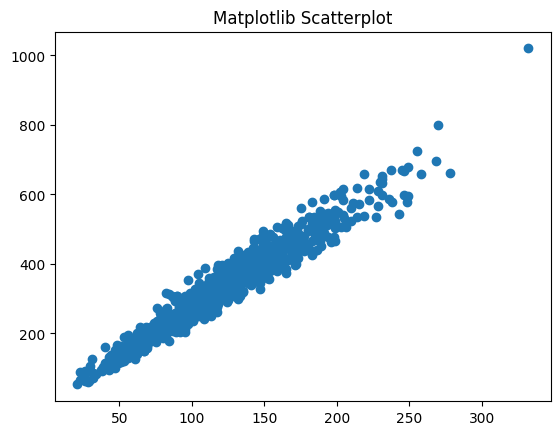

In [5]:
plt.scatter(x=player_data['FIELD_GOALS_MADE'], y=player_data['POINTS'])
plt.title('Matplotlib Scatterplot')
plt.show()

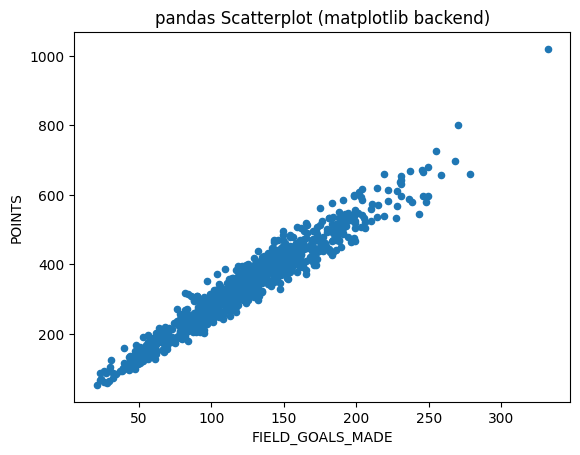

In [6]:
player_data.plot.scatter(x='FIELD_GOALS_MADE', y='POINTS', title='pandas Scatterplot (matplotlib backend)')
plt.show()

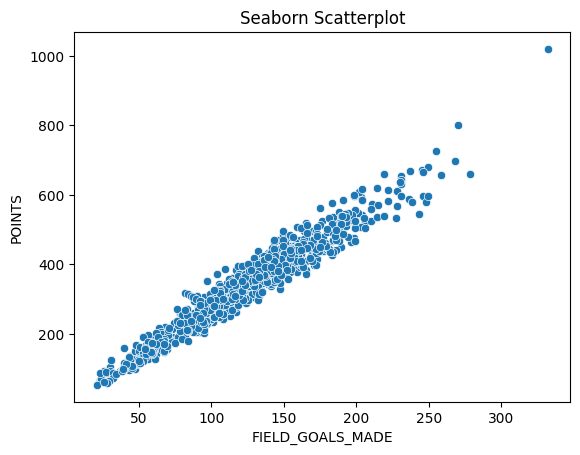

In [7]:
sns.scatterplot(player_data, x='FIELD_GOALS_MADE', y='POINTS').set_title('Seaborn Scatterplot')
plt.show()

In [8]:
fig = px.scatter(player_data, x='FIELD_GOALS_MADE', y='POINTS', title='Plotly Scatterplot')
fig.show()

## Set Graph Preferences

In [9]:
graph_colors = ['#615EEA', '#339E7A', '#ff8c6c']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=graph_colors)
sns.set_palette(graph_colors)

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [11]:
plt.style.use('seaborn-v0_8-white')

# Generate Visualizations

## Scatterplot of Field Goals Made vs Points

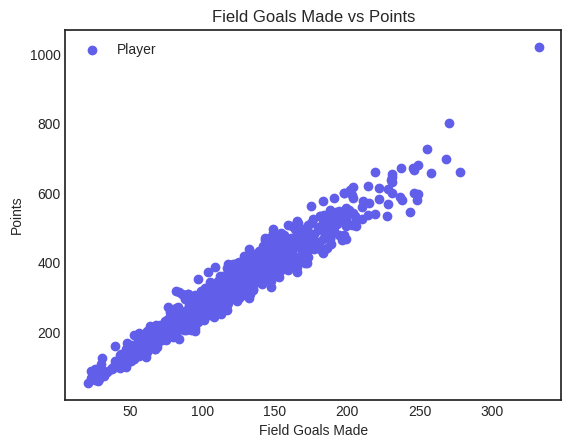

In [12]:
plt.scatter(player_data['FIELD_GOALS_MADE'], player_data['POINTS'], label='Player')
plt.xlabel('Field Goals Made')
plt.ylabel('Points')
plt.title('Field Goals Made vs Points')
plt.legend()
plt.show()

### Add Line of Best Fit to Scatterplot

In [13]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(player_data['FIELD_GOALS_MADE'], player_data['POINTS'])
x_values = np.array([min(player_data['FIELD_GOALS_MADE']), max(player_data['FIELD_GOALS_MADE'])])
y_values = slope * x_values + intercept
print(f"Equation of the trend line: y = {slope:.2f}x + {intercept:.2f}")

Equation of the trend line: y = 2.65x + 11.11


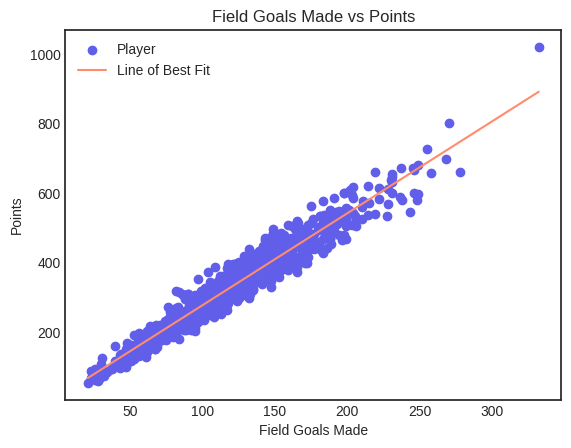

In [14]:
plt.scatter(player_data['FIELD_GOALS_MADE'], player_data['POINTS'], label='Player')
plt.plot(x_values, y_values, color='#ff8c6c', label='Line of Best Fit')
plt.xlabel('Field Goals Made')
plt.ylabel('Points')
plt.title('Field Goals Made vs Points')
plt.legend()
plt.show()

### View Top Players by Points

In [15]:
player_data.nlargest(5, 'FIELD_GOALS_MADE')[['PLAYER_NAME', 'TEAM_NAME', 'Class', 'Position', 'FIELD_GOALS_MADE']]

,PLAYER_NAME,TEAM_NAME,Class,Position,FIELD_GOALS_MADE
77,Caitlin Clark,Iowa,Senior,Guard,332
261,Elizabeth Kitley,Virginia Tech,Senior,Center,278
291,JuJu Watkins,USC,Freshman,Guard,270
135,Lucy Olsen,Iowa,Junior,Guard,268
237,Chellia Watson,Buffalo,Senior,Guard,258


## Scatterplot of Minutes Played vs Points

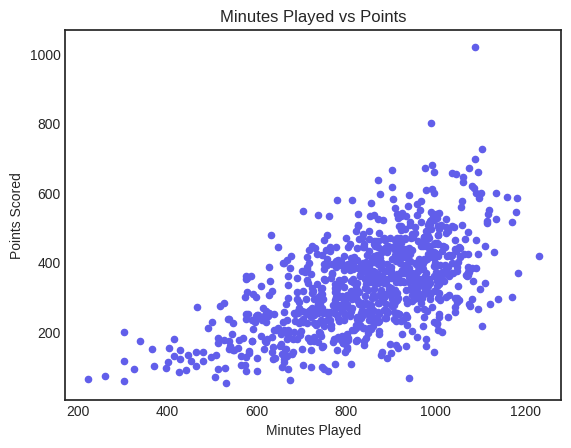

In [16]:
player_data.plot(x='MINUTES_PLAYED', y='POINTS', kind='scatter', title='Minutes Played vs Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points Scored')
plt.show()

## Box Plot of Height by Position

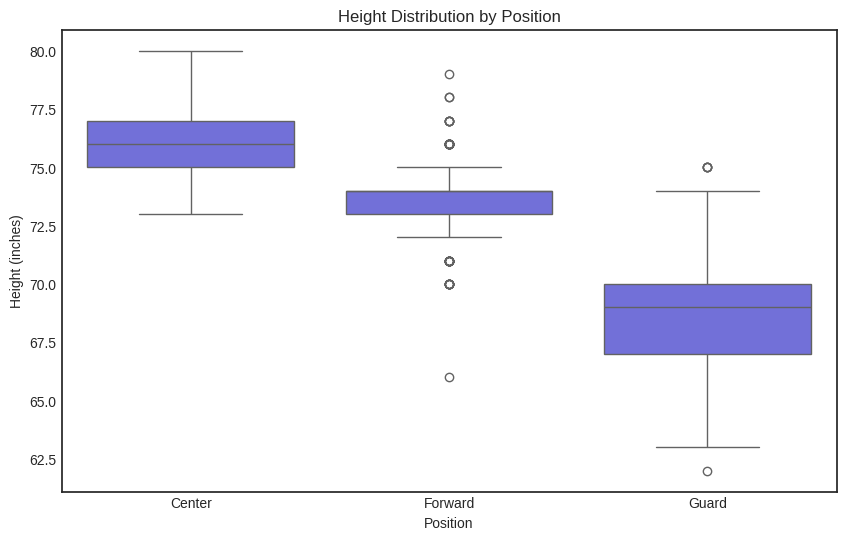

In [17]:
# Get the unique values in the "Position" column and sort alphabetically
position_order = sorted(player_data['Position'].unique())

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Height', data=player_data, order=position_order)
plt.title('Height Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Height (inches)')
plt.show()

## Box Plot of Three Points Made by Conference

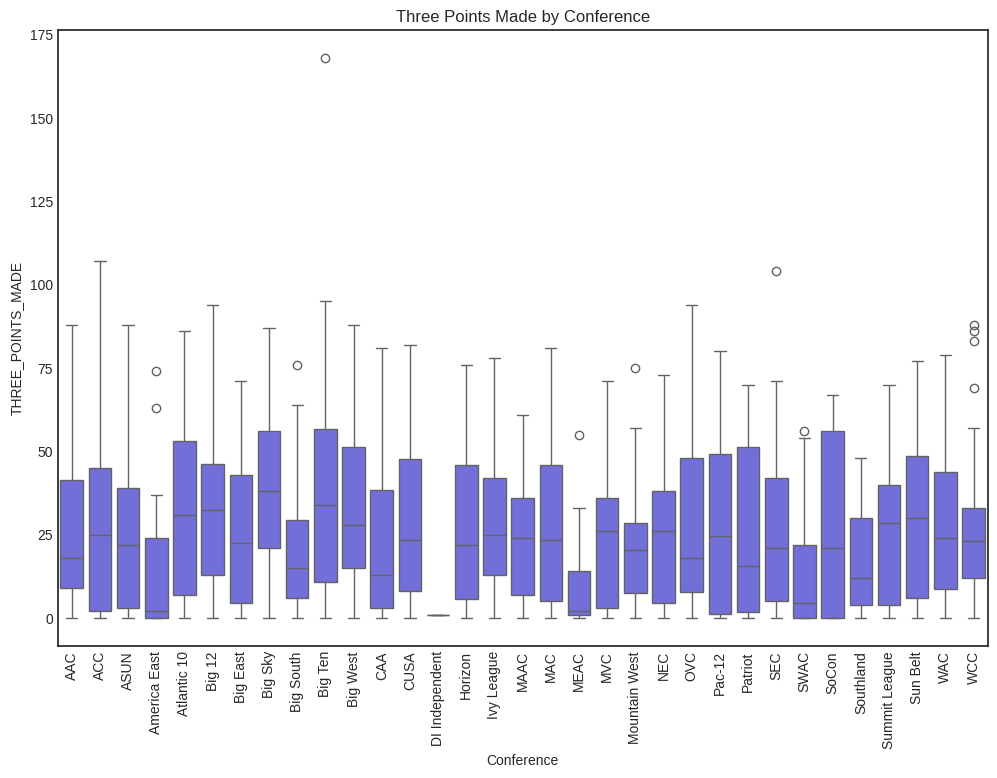

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Conference", y="THREE_POINTS_MADE", data=player_data, order=sorted(player_data['Conference'].unique()))
plt.xticks(rotation=90)
plt.title('Three Points Made by Conference')
plt.show()

In [19]:
player_data[player_data['THREE_POINTS_MADE'] > 0].groupby('Conference').size()

Conference
AAC               35
ACC               37
ASUN              16
America East      12
Atlantic 10       34
Big 12            40
Big East          27
Big Sky           20
Big South         15
Big Ten           40
Big West          25
CAA               28
CUSA              19
DI Independent     1
Horizon           21
Ivy League        15
MAAC              26
MAC               23
MEAC              10
MVC               29
Mountain West     25
NEC               12
OVC               22
Pac-12            32
Patriot           16
SEC               40
SWAC              18
SoCon             11
Southland         19
Summit League     19
Sun Belt          33
WAC               26
WCC               24
dtype: int64

In [20]:
player_data.sort_values(by='THREE_POINTS_MADE', ascending=False)[['PLAYER_NAME', 'Conference', 'TEAM_NAME', 'THREE_POINTS_MADE']].head()

,PLAYER_NAME,Conference,TEAM_NAME,THREE_POINTS_MADE
77,Caitlin Clark,Big Ten,Iowa,168
92,Dyaisha Fair,ACC,Syracuse,107
643,Aaliyah Nye,SEC,Alabama,104
635,Sara Scalia,Big Ten,Indiana,95
611,Madison Conner,Big 12,TCU,94


## Stacked Bar Chart of Rebound Type by Position

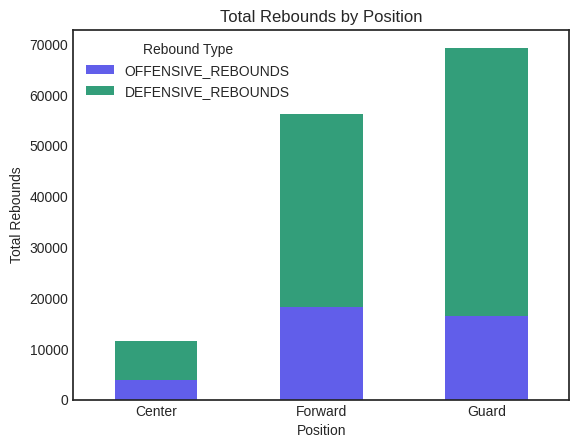

In [21]:
# Group by "Position" and sum the rebound columns
grouped_rebounds = player_data.groupby('Position').agg({
    'OFFENSIVE_REBOUNDS': 'sum',
    'DEFENSIVE_REBOUNDS': 'sum',
    'TOTAL_REBOUNDS': 'sum'
})

# Create a stacked bar plot
ax = grouped_rebounds.plot(x=None, y=['OFFENSIVE_REBOUNDS', 'DEFENSIVE_REBOUNDS'], kind="bar", rot=0, stacked=True)
ax.set_title('Total Rebounds by Position')
ax.set_xlabel('Position')
ax.set_ylabel('Total Rebounds')
ax.legend(title='Rebound Type')
plt.show()

In [22]:
grouped_rebounds

,OFFENSIVE_REBOUNDS,DEFENSIVE_REBOUNDS,TOTAL_REBOUNDS
Position,,,
Center,3867,7575,11442
Forward,18305,37903,56208
Guard,16404,52893,69297


## Heatmap of Player Assists and Steals by Height

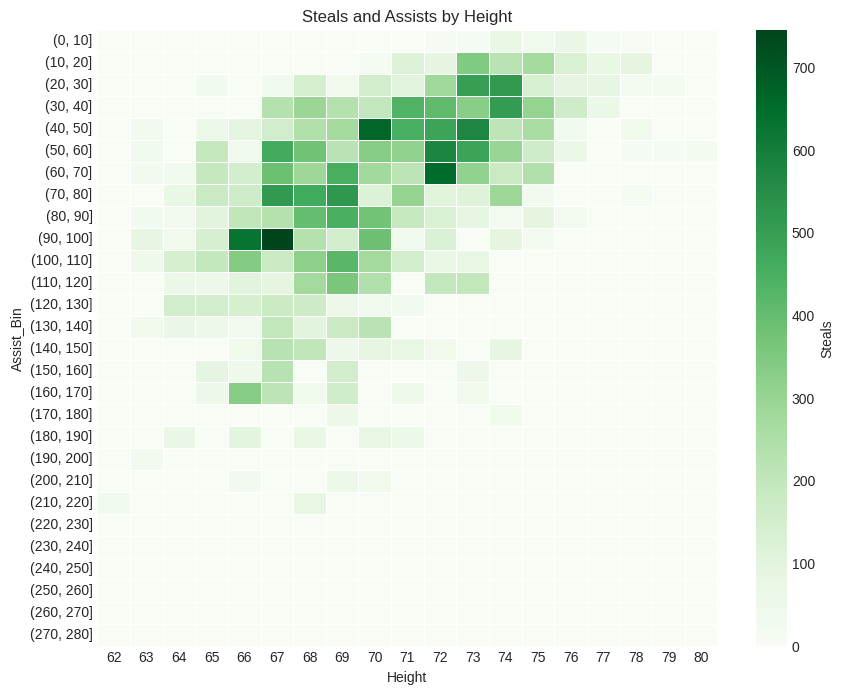

In [23]:
# Define bins
assist_bins = np.arange(0, player_data['ASSISTS'].max() + 1, 10)
player_data['Assist_Bin'] = pd.cut(player_data['ASSISTS'], bins=assist_bins)

# Create heatmap
plt.figure(figsize=(10, 8))
heatmap_data = player_data.pivot_table(index='Assist_Bin', columns='Height', values='STEALS', aggfunc='sum', observed=False)
sns.heatmap(heatmap_data, cmap='Greens', linewidths=0.5, cbar_kws={'label': 'Steals'})
plt.title('Steals and Assists by Height')
plt.show()

## Violin Plot of Points by Class

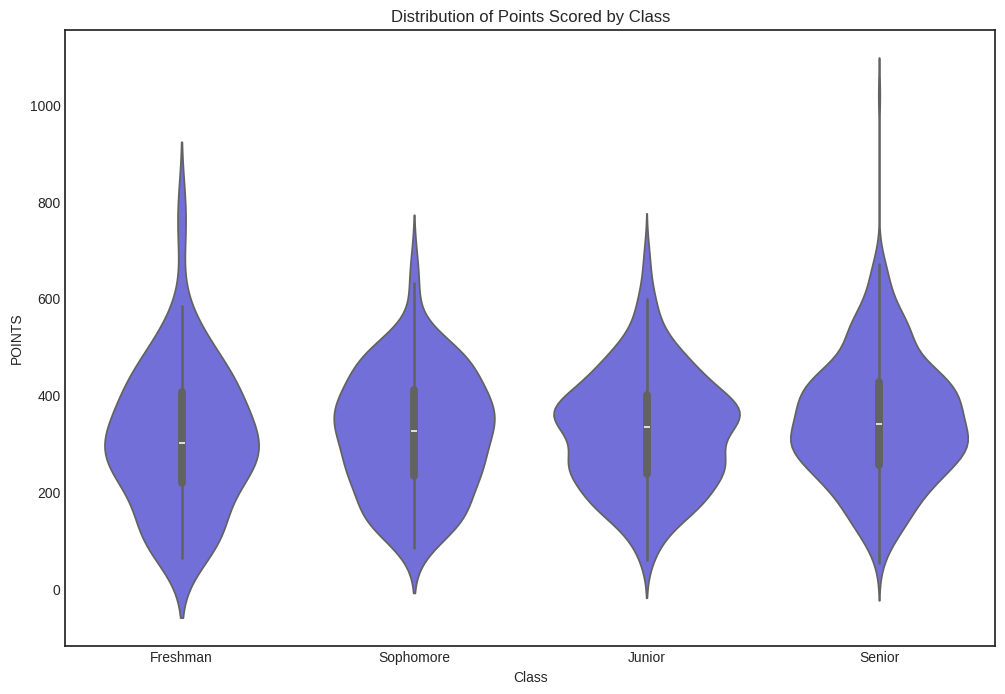

In [24]:
plt.figure(figsize=(12, 8))
sns.violinplot(x="Class", y="POINTS", data=player_data, order=['Freshman', 'Sophomore', 'Junior', 'Senior'])
plt.title('Distribution of Points Scored by Class')
plt.show()

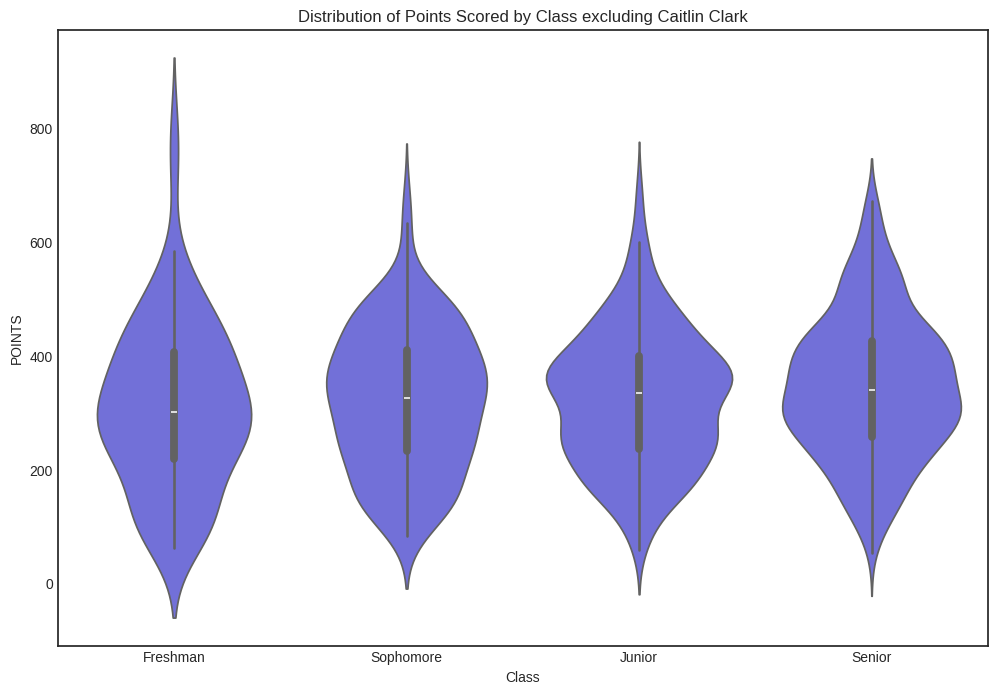

In [25]:
violin_data = player_data.loc[player_data['PLAYER_NAME'] != 'Caitlin Clark']

plt.figure(figsize=(12, 8))
sns.violinplot(x="Class", y="POINTS", data=violin_data, order=['Freshman', 'Sophomore', 'Junior', 'Senior'])
plt.title('Distribution of Points Scored by Class excluding Caitlin Clark')
plt.show()

## Histogram of Fouls per Game

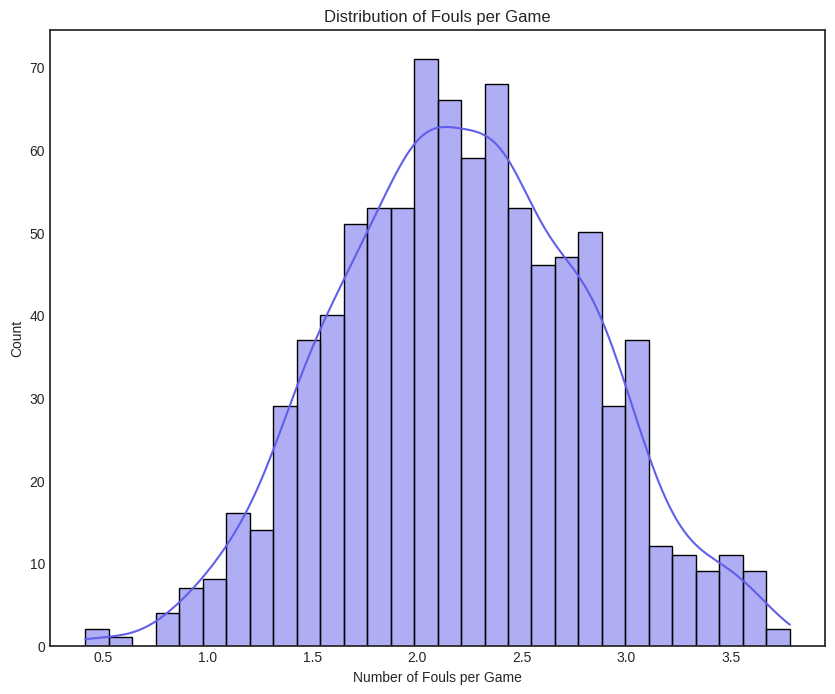

In [26]:
plt.figure(figsize=(10, 8))
sns.histplot(player_data['FOULS_PER_GAME'], bins=30, kde=True)
plt.title('Distribution of Fouls per Game')
plt.xlabel('Number of Fouls per Game')
plt.ylabel('Count')
plt.show()

## Joint Plot of Fantasy Points vs Turnovers

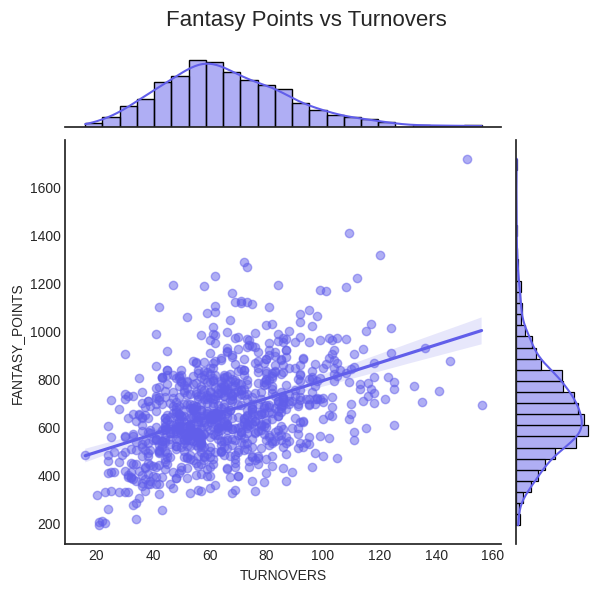

In [27]:
sns.jointplot(x='TURNOVERS', y='FANTASY_POINTS', data=player_data, kind='reg', scatter_kws={'alpha': 0.5})
plt.subplots_adjust(top=0.9)
plt.suptitle('Fantasy Points vs Turnovers', fontsize=16)
plt.show()